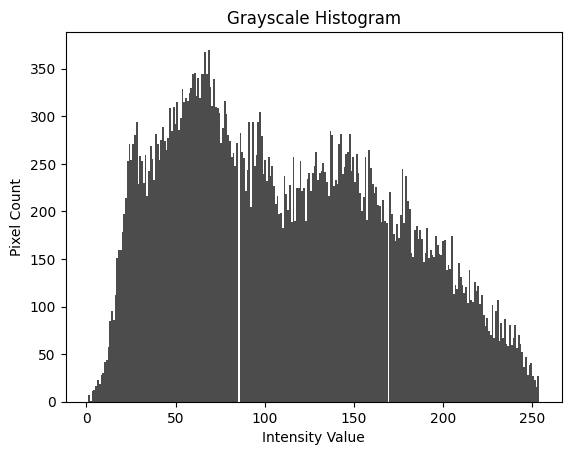

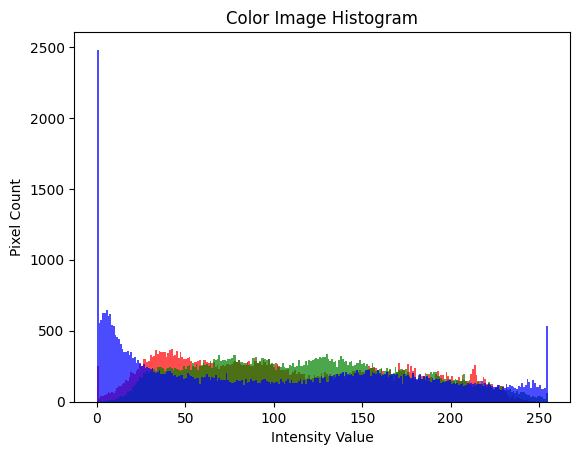

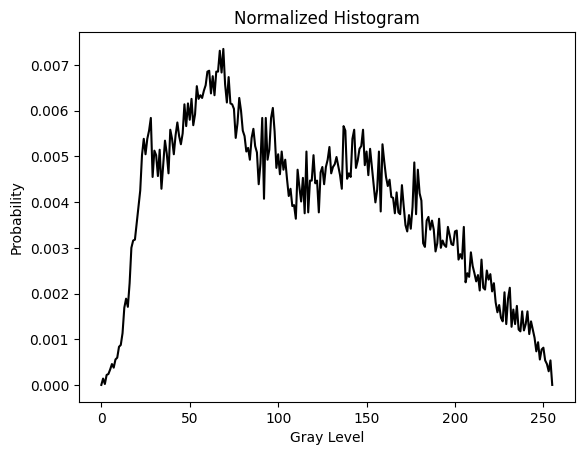

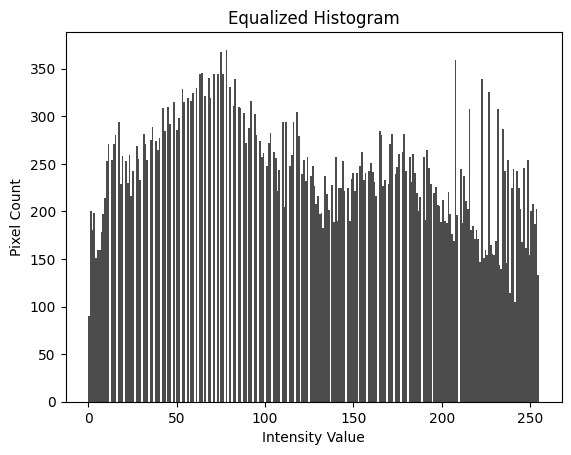

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/sample_data/images.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Task 1: Histogram Analysis and Equalization

# Function to plot histogram
def plot_histogram(image, title, color=('k',)):
    plt.figure()
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    if len(image.shape) == 2:  # Grayscale
        plt.hist(image.ravel(), bins=256, color=color[0], alpha=0.7)
    else:  # Color Image
        for (chan, col) in zip(cv2.split(image), color):
            plt.hist(chan.ravel(), bins=256, color=col, alpha=0.7)
    plt.show()

# Plot histograms
plot_histogram(gray_image, "Grayscale Histogram")
plot_histogram(image, "Color Image Histogram", color=('r', 'g', 'b'))

# Normalize histogram
def normalize_histogram(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist /= hist.sum()
    plt.figure()
    plt.title("Normalized Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.plot(hist, color='k')
    plt.show()

normalize_histogram(gray_image)

# Histogram Equalization
eq_image = cv2.equalizeHist(gray_image)
plot_histogram(eq_image, "Equalized Histogram")

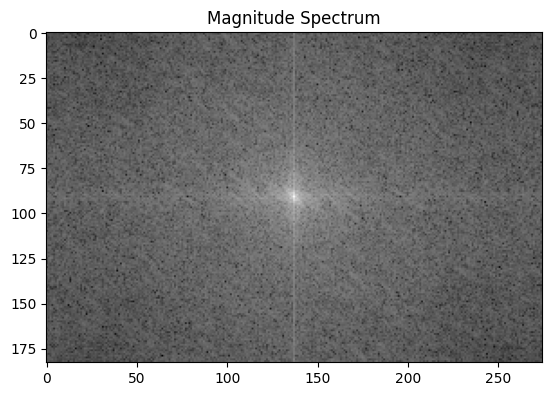

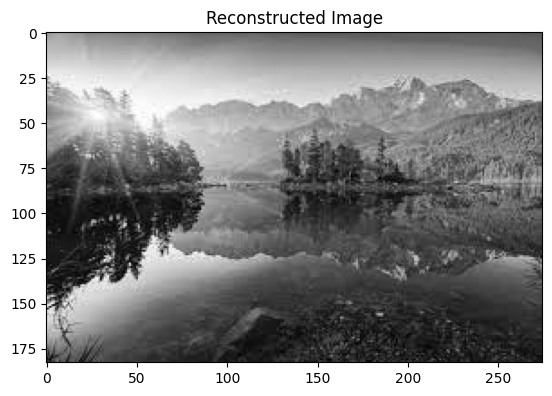

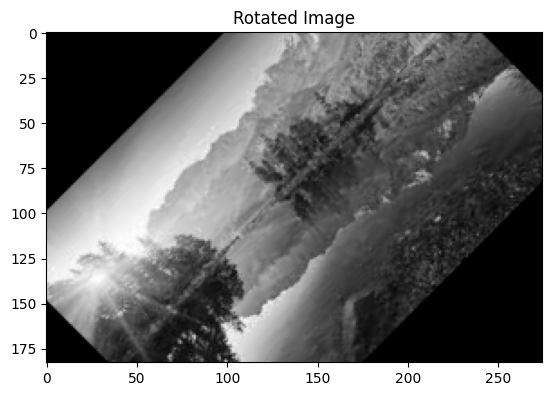

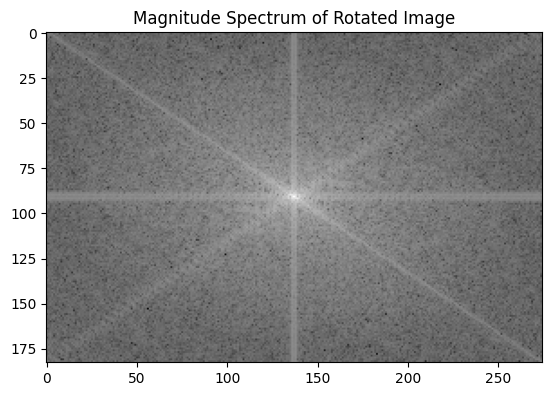

In [3]:
# Task 2: Fourier Transform and Rotation Property

# Fourier Transform
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

plt.figure()
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

# Inverse Fourier Transform
f_ishift = np.fft.ifftshift(f_shift)
image_reconstructed = np.fft.ifft2(f_ishift)
image_reconstructed = np.abs(image_reconstructed)

plt.figure()
plt.title("Reconstructed Image")
plt.imshow(image_reconstructed, cmap='gray')
plt.show()

# Rotation and Fourier Transform Comparison
angle = 45
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

f_transform_rot = np.fft.fft2(rotated_image)
f_shift_rot = np.fft.fftshift(f_transform_rot)
magnitude_spectrum_rot = 20 * np.log(np.abs(f_shift_rot))

plt.figure()
plt.title("Rotated Image")
plt.imshow(rotated_image, cmap='gray')
plt.show()

plt.figure()
plt.title("Magnitude Spectrum of Rotated Image")
plt.imshow(magnitude_spectrum_rot, cmap='gray')
plt.show()